# The Qubit

This tutorial introduces you to one of the core concepts in quantum computing - the qubit, and its representation in mathematical notation and using Qiskit code.

If you aren't familiar with [complex arithmetic](../ComplexArithmetic/ComplexArithmetic.ipynb) and [linear algebra](../LinearAlgebra/LinearAlgebra.ipynb), we recommend that you complete those tutorials first.

This tutorial covers the following topics:
* The concept of a qubit
* Superposition
* Vector representation of qubit states
* Dirac notation
* `Qubit` in Qiskit

# The Concept of a Qubit

The basic building block of a classical computer is the bit - a single memory cell that is either in state $0$ or in state $1$. Similarly, the basic building block of a quantum computer is the quantum bit, or **qubit**. Like the classical bit, a qubit can be in state $0$ or in state $1$. Unlike the classical bit, however, the qubit isn't limited to just those two states - it may also be in a combination, or **superposition** of those states.

> A common misconception about quantum computing is that a qubit is always in one state or the other, we just don't know which one until we "measure" it. That is not the case. A qubit in a superposition is in a state between the states $0$ and $1$. When a qubit is measured, it is forced entirely into one state or the other - in other words, measuring it actually changes its state.

# Matrix Representation

The state of a qubit is represented by a complex vector of size 2:

$$\begin{bmatrix} \alpha \\ \beta \end{bmatrix}$$

Here $\alpha$ represents how "close" the qubit is to the state $0$, and $\beta$ represents how "close" the qubit is to the state $1$. This vector is normalized: $|\alpha|^2 + |\beta|^2 = 1$.

$\alpha$ and $\beta$ are known as **amplitudes** of states $0$ and $1$, respectively.

# Basis States

A qubit in state $0$ would be represented by the following vector:

$$\begin{bmatrix} 1 \\ 0 \end{bmatrix}$$

Likewise, a qubit in state $1$ would be represented by this vector:

$$\begin{bmatrix} 0 \\ 1 \end{bmatrix}$$

Note that you can use scalar multiplication and vector addition to express any qubit state as a sum of these two vectors with certain weights (known as **linear combination**):

$$\begin{bmatrix} \alpha \\ \beta \end{bmatrix} =
\begin{bmatrix} \alpha \\ 0 \end{bmatrix} + \begin{bmatrix} 0 \\ \beta \end{bmatrix} =
\alpha \cdot \begin{bmatrix} 1 \\ 0 \end{bmatrix} + \beta \cdot \begin{bmatrix} 0 \\ 1 \end{bmatrix}$$

Because of this, these two states are known as **basis states**.

These two vectors have two additional properties. First, as mentioned before, both are **normalized**:

$$\langle \begin{bmatrix} 1 \\ 0 \end{bmatrix} , \begin{bmatrix} 1 \\ 0 \end{bmatrix} \rangle =
\langle \begin{bmatrix} 0 \\ 1 \end{bmatrix} , \begin{bmatrix} 0 \\ 1 \end{bmatrix} \rangle = 1$$

Second, they are **orthogonal** to each other:

$$\langle \begin{bmatrix} 1 \\ 0 \end{bmatrix} , \begin{bmatrix} 0 \\ 1 \end{bmatrix} \rangle =
\langle \begin{bmatrix} 0 \\ 1 \end{bmatrix} , \begin{bmatrix} 1 \\ 0 \end{bmatrix} \rangle = 0$$

> As a reminder, $\langle V , W \rangle$ is the [inner product](../LinearAlgebra/LinearAlgebra.ipynb#Inner-Product) of $V$ and $W$.

This means that these vectors form an **orthonormal basis**. The basis of $\begin{bmatrix} 1 \\ 0 \end{bmatrix}$ and $\begin{bmatrix} 0 \\ 1 \end{bmatrix}$ is called the **computational basis**, also known as the **canonical basis**.

> There exist other orthonormal bases, for example, the **Hadamard basis**, formed by the vectors
>
> $$\begin{bmatrix} \frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}} \end{bmatrix} \text{ and } \begin{bmatrix} \frac{1}{\sqrt{2}} \\ -\frac{1}{\sqrt{2}} \end{bmatrix}$$
>
> You can check that these vectors are normalized, and orthogonal to each other. Any qubit state can be expressed as a linear combination of these vectors:
>
> $$\begin{bmatrix} \alpha \\ \beta \end{bmatrix} =
\frac{\alpha + \beta}{\sqrt{2}} \begin{bmatrix} \frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}} \end{bmatrix} +
\frac{\alpha - \beta}{\sqrt{2}} \begin{bmatrix} \frac{1}{\sqrt{2}} \\ -\frac{1}{\sqrt{2}} \end{bmatrix}$$
>
> The Hadamard basis is widely used in quantum computing, for example, in the [BB84 quantum key distribution protocol](https://en.wikipedia.org/wiki/BB84).

# Dirac Notation

Writing out each vector when doing quantum calculations takes up a lot of space, and this will get even worse once we introduce quantum gates and multi-qubit systems. **Dirac notation** is a shorthand notation that helps solve this issue. In Dirac notation, a vector is denoted by a symbol called a **ket**. For example, a qubit in state $0$ is represented by the ket $|0\rangle$, and a qubit in state $1$ is represented by the ket $|1\rangle$:

<table>
    <col width=150>
    <col width=150>
    <tr>
        <td style="text-align:center; border:1px solid">$|0\rangle = \begin{bmatrix} 1 \\ 0 \end{bmatrix}$</td>
        <td style="text-align:center; border:1px solid">$|1\rangle = \begin{bmatrix} 0 \\ 1 \end{bmatrix}$</td>
    </tr>
</table>

These two kets represent basis states, so they can be used to represent any other state:

$$\begin{bmatrix} \alpha \\ \beta \end{bmatrix} = \alpha|0\rangle + \beta|1\rangle$$

Any symbol other than $0$ or $1$ within the ket can be used to represent arbitrary vectors, similar to how variables are used in algebra: 

$$|\psi\rangle = \alpha|0\rangle + \beta|1\rangle$$

Several ket symbols have a generally accepted use, such as:

<table>
    <col width=180>
    <col width=180>
    <tr>
        <td style="text-align:center; border:1px solid">$|+\rangle = \frac{1}{\sqrt{2}}\big(|0\rangle + |1\rangle\big)$</td>
        <td style="text-align:center; border:1px solid">$|-\rangle = \frac{1}{\sqrt{2}}\big(|0\rangle - |1\rangle\big)$</td>
    </tr>
    <tr>
        <td style="text-align:center; border:1px solid">$|i\rangle = \frac{1}{\sqrt{2}}\big(|0\rangle + i|1\rangle\big)$</td>
        <td style="text-align:center; border:1px solid">$|-i\rangle = \frac{1}{\sqrt{2}}\big(|0\rangle - i|1\rangle\big)$</td>
    </tr>
</table>

We will learn more about Dirac notation in the next tutorials, as we introduce quantum gates and multi-qubit systems.

Qiskit
===

## Qubit in Qiskit

In Qiskit, a qubit is represented by the `QuantumRegister` class.
On a physical quantum computer, it's impossible to directly access the state of a qubit, whether to read its exact state, or to set it to a desired state, and this data type reflects that. Instead, you can change the state of a qubit using [quantum gates](../SingleQubitGates/SingleQubitGates.ipynb), and extract information about the state of the system using measurements.

That being said, when you run qiskit code on a quantum simulator instead of a physical quantum computer, you can use diagnostic functions that allow you to peek at the state of the quantum system. This is very useful both for learning and for debugging small qiskit programs.

> Implementation of a Qubit in qiskit

In qiskit, a qubit is represented by the `QuantumRegister` class. It is initialized with a single integer parameter, which specifies the number of qubits in the register. For example, the following code creates a quantum register with 1 qubit:

```python
from qiskit import QuantumRegister
q = QuantumRegister(1)
```

Freshly allocated qubits start out in state $|0\rangle$

### <span style="color:blue">Demo: Examining Qubit States in Qiskit</span>

> In this demo, we will examine the state of a qubit using the Statevector class. This class allows us to examine the state of a quantum system, and is useful for debugging small qiskit programs.


```python
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector

# Create a Quantum Circuit acting on the q register
circuit = QuantumCircuit(q)

# print the state of the qubit
print("The state of the qubit is: ", Statevector.from_instruction(circuit).data)

# set the state to |-> state by applying a X gate followed by a H gate
circuit.x(q)
circuit.h(q)

# print the state of the qubit
print("The state of the qubit is: ", Statevector.from_instruction(circuit).data)
```



In [7]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector

# Create a Quantum Circuit acting on the q register
circuit = QuantumCircuit(1)

# print the statevector
print(f"Initial Statevector: {Statevector.from_instruction(circuit).data}\n\n")

# Add an X gate followed by a H gate to put the qubit in |-> state
circuit.x(0)
circuit.h(0)

print("After putting the qubit in |-> state\n\n")

# print the statevector
print("Final Statevector: ", Statevector.from_instruction(circuit).data)

Initial Statevector: [1.+0.j 0.+0.j]


After putting the qubit in |-> state


Final Statevector:  [ 0.70710678+0.j -0.70710678+0.j]


### <span style="color:blue">Demo: Simulating Circuits</span>

> To simulate a circuit we use the quant_info module in Qiskit. This simulator returns the quantum state, which is a complex vector of dimensions $2^n$, where $n$ is the number of qubits in the circuit. There are two stages to the simulator. The first is to set the input state and the second to evolve the state by the quantum circuit.

We will demonstrate the three qubit GHZ state $|\psi\rangle = \frac{1}{\sqrt{2}}(|000\rangle + |111\rangle)$

#### <span style="color:blue">Step 1: Building the circuit</span>

```python
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.quantum_info import Statevector

# Create a Quantum Register with 3 qubits.
qr = QuantumRegister(3)

# Create a Quantum Circuit acting on the qr
circuit = QuantumCircuit(qr)

# Add a H gate on qubit 0, putting this qubit in superposition.
circuit.h(qr[0])

# Add a CX (CNOT) gate on control qubit 0 and target qubit 1
circuit.cx(qr[0], qr[1])

# Add a CX (CNOT) gate on control qubit 0 and target qubit 2
circuit.cx(qr[0], qr[2])
```

#### <span style="color:blue">Visualizing the circuit</span>

```python
# Draw the circuit
circuit.draw(output='mpl')
```

#### <span style="color:blue">Step 2: Simulating the circuit</span>

```python
# Set the intial state of the simulator to the ground state using from_int
state = Statevector.from_int(0, 2**3)

# Evolve the state by the quantum circuit
state = state.evolve(circ)

#draw using latex
state.draw('latex')

from qiskit.visualization import array_to_latex

#Alternative way of representing in latex
array_to_latex(state)
```

In [1]:
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.quantum_info import Statevector

# Create a Quantum Register with 3 qubits
q = QuantumRegister(3)

# Create a Quantum Circuit acting on the q register to demonstrate the GHZ state
circuit = QuantumCircuit(q)

# Add a H gate on qubit 0, putting this qubit in superposition.
circuit.h(q[0])

# Add a CX (CNOT) gate on control qubit 0 and target qubit 1
circuit.cx(q[0], q[1])

# Add a CX (CNOT) gate on control qubit 0 and target qubit 2
circuit.cx(q[0], q[2])


In [2]:
from qiskit.quantum_info import Statevector

# Set the intial state of the simulator to the ground state using from_int
state = Statevector.from_int(0, 2**3)

# Evolve the state by the quantum circuit
state = state.evolve(circuit)

#draw using latex
state.draw('latex')

<IPython.core.display.Latex object>

In [3]:
from qiskit.visualization import array_to_latex

#Alternative way of representing in latex
array_to_latex(state)

<IPython.core.display.Latex object>

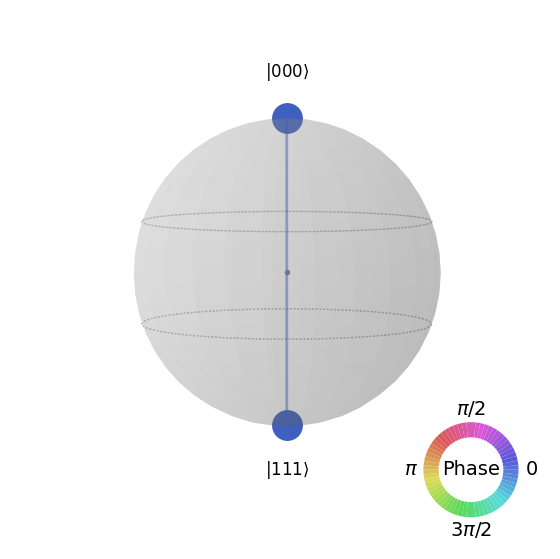

In [4]:
state.draw('qsphere')

# Relative and Global Phase

You may recall that a complex number has a parameter called its phase. If a complex number $x$ is written in [polar form](../ComplexArithmetic/ComplexArithmetic.ipynb#Polar-coordinates) $x = re^{i\theta}$, its phase is $\theta$.

The phase of a basis state is the complex phase of the amplitude of that state. For example, a system in state $\frac{1 + i}{2}|0\rangle + \frac{1 - i}{2}|1\rangle$, the phase of $|0\rangle$ is $\frac{\pi}{4}$, and the phase of $|1\rangle$ is $-\frac{\pi}{4}$. The difference between these two phases is known as **relative phase**.

Multiplying the state of the entire system by $e^{i\theta}$ doesn't affect the relative phase: $\alpha|0\rangle + \beta|1\rangle$ has the same relative phase as $e^{i\theta}\big(\alpha|0\rangle + \beta|1\rangle\big)$. In the second expression, $\theta$ is known as the system's **global phase**.

The state of a qubit (or, more generally, the state of a quantum system) is defined by its relative phase - global phase arises as a consequence of using linear algebra to represent qubits, and has no physical meaning. That is, applying a phase to the entire state of a system (multiplying the entire vector by $e^{i\theta}$ for any real $\theta$) doesn't actually affect the state of the system. Because of this, global phase is sometimes known as **unobservable phase** or **hidden phase**.

# Conclusion

This should be enough for you to gain a basic understanding of qubits and qubit states. Next, you will learn how to manipulate those states in the [single-qubit gates tutorial](../SingleQubitGates/SingleQubitGates.ipynb).